In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pytesseract
import cv2
import numpy as np
import os
import imutils
import re



In [2]:
pytesseract.pytesseract.tesseract_cmd =r"C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe"

### preprocessing

In [3]:
img = cv2.imread('360_F_232922178_YCAxIU0vlGoGY2H76ZsATswNrOVbWlUv.jpg')

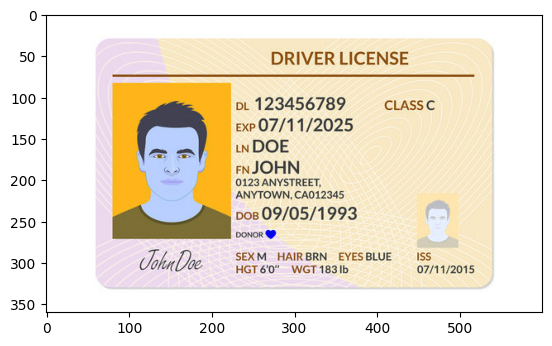

In [4]:
plt.imshow(img)
## sorry only find a driving license

In [ ]:
def preprocessing(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    th=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,101,21)
    return th

In [5]:
img.shape

(360, 600, 3)

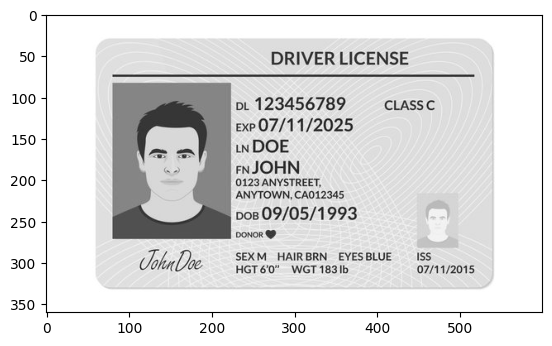

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,'gray')

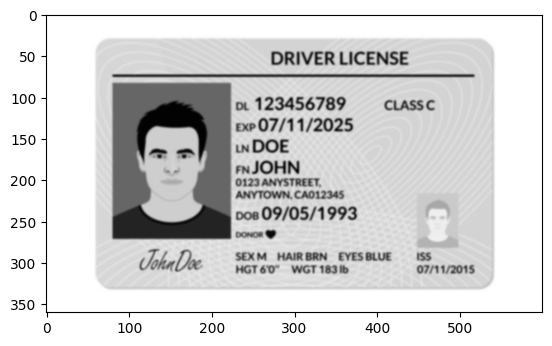

In [26]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred,'gray')

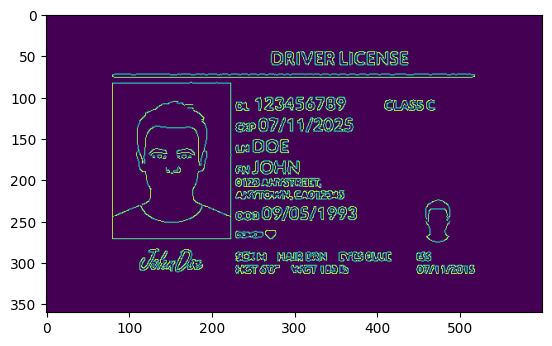

In [28]:
edges = cv2.Canny(blurred, 50, 150)
plt.imshow(edges)

In [29]:
ocr_result = pytesseract.image_to_string(th)
print(ocr_result)

DRIVER LICENSE

po. 123456789 CLASSC
exe 07/11/2025

inDOE

rnJOHN

0123 ANYSTREET,
ANYTOWN, CA012345

p08 09/05/1993 a

DONOR gw chet s
SEXM HAIRBRN EYESBLUE ISS
Cohabee HGT 60" WGT183ib 7/1/2015 <




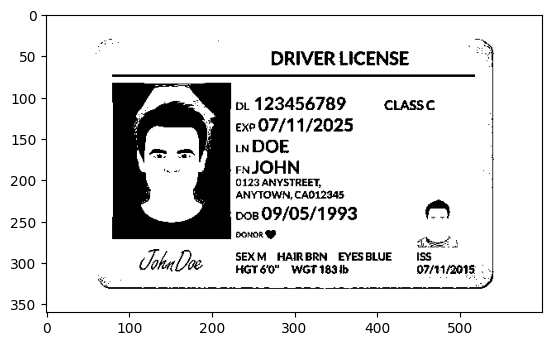

In [33]:
th=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,101,21)
plt.imshow(th,'gray')

### contours

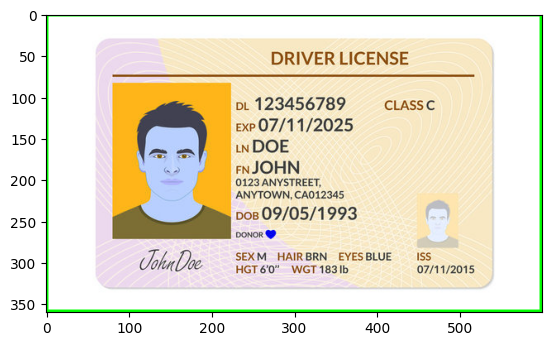

In [24]:
contours = cv2.findContours(th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

# Find the largest contour by area
largest_contour = max(contours, key=cv2.contourArea)

# Draw the largest contour on the original image
output_image = img.copy()
plt.imshow(cv2.drawContours(output_image, [largest_contour], -1, (0, 255, 0), 3))

In [34]:
ocr_result = pytesseract.image_to_string(th)
print(ocr_result)

DRIVER LICENSE

po. 123456789 CLASSC
exe 07/11/2025

inDOE

rnJOHN

0123 ANYSTREET,
ANYTOWN, CA012345

p08 09/05/1993 a

DONOR gw chet s
SEXM HAIRBRN EYESBLUE ISS
Cohabee HGT 60" WGT183ib 7/1/2015 <




In [37]:
#lines = ocr_result.split('\n')
#lines

### text extraction

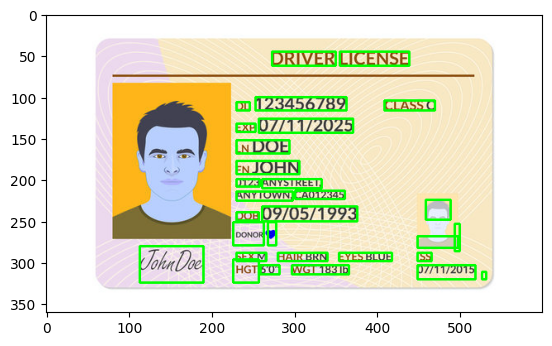

In [39]:
from pytesseract import Output

dim = []
d = pytesseract.image_to_data(th, output_type=Output.DICT)
n_boxes = len(d['level'])
# Iterate over each detected text box
for i in range(n_boxes):
    if d['text'][i].strip():  # Only consider non-empty text
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # Append the bounding box dimensions to the list
        dim.append({'text': d['text'][i], 'box': (x, y, w, h)})
plt.imshow(img)

In [40]:
dim

[{'text': 'DRIVER', 'box': (273, 45, 77, 17)},
 {'text': 'LICENSE', 'box': (355, 45, 84, 17)},
 {'text': 'po.', 'box': (230, 106, 16, 10)},
 {'text': '123456789', 'box': (253, 100, 110, 16)},
 {'text': 'CLASSC', 'box': (409, 104, 61, 12)},
 {'text': 'exe', 'box': (230, 132, 23, 10)},
 {'text': '07/11/2025', 'box': (257, 126, 114, 17)},
 {'text': 'inDOE', 'box': (230, 152, 64, 16)},
 {'text': 'rnJOHN', 'box': (230, 177, 76, 16)},
 {'text': '0123', 'box': (230, 199, 28, 9)},
 {'text': 'ANYSTREET,', 'box': (261, 199, 72, 11)},
 {'text': 'ANYTOWN,', 'box': (230, 214, 68, 11)},
 {'text': 'CA012345', 'box': (301, 213, 60, 10)},
 {'text': 'p08', 'box': (230, 239, 27, 10)},
 {'text': '09/05/1993', 'box': (261, 232, 115, 18)},
 {'text': 'a', 'box': (459, 224, 30, 24)},
 {'text': 'DONOR', 'box': (226, 251, 37, 28)},
 {'text': 'gw', 'box': (268, 251, 10, 28)},
 {'text': 'chet', 'box': (449, 268, 49, 14)},
 {'text': 's', 'box': (494, 253, 6, 33)},
 {'text': 'SEXM', 'box': (230, 288, 36, 10)},
 {'t

In [42]:
target_texts = {
    '123456789', 'CLASSC', '07/11/2025', 'inDOE', 'rnJOHN','09/05/1993', 'SEXM', 'HAIRBRN','EYESBLUE', '7/1/2015'
}

In [46]:
found_texts = []

# Iterate over each detected text box
n_boxes = len(d['level'])
for i in range(n_boxes):
    text = d['text'][i].strip()
    if text in target_texts:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        found_texts.append({'text': text, 'box': (x, y, w, h)})



In [47]:
found_texts

[{'text': '123456789', 'box': (253, 100, 110, 16)},
 {'text': 'CLASSC', 'box': (409, 104, 61, 12)},
 {'text': '07/11/2025', 'box': (257, 126, 114, 17)},
 {'text': 'inDOE', 'box': (230, 152, 64, 16)},
 {'text': 'rnJOHN', 'box': (230, 177, 76, 16)},
 {'text': '09/05/1993', 'box': (261, 232, 115, 18)},
 {'text': 'SEXM', 'box': (230, 288, 36, 10)},
 {'text': 'HAIRBRN', 'box': (280, 288, 60, 10)},
 {'text': 'EYESBLUE', 'box': (354, 288, 64, 10)},
 {'text': '7/1/2015', 'box': (449, 303, 70, 17)}]

### putting data into DF

In [50]:
def extract_text_from_box(image, box):
    x, y, w, h = box
    roi = image[y:y+h, x:x+w]
    
    # Apply OCR on the cropped ROI
    text = pytesseract.image_to_string(roi).strip()
    return text

In [51]:
all_extracted=[]
for item in found_texts:
    text = extract_text_from_box(th, item['box'])
    all_extracted.append(f"{item['text']}")

In [52]:
all_extracted

['123456789',
 'CLASSC',
 '07/11/2025',
 'inDOE',
 'rnJOHN',
 '09/05/1993',
 'SEXM',
 'HAIRBRN',
 'EYESBLUE',
 '7/1/2015']

In [53]:
df = pd.DataFrame(columns=['DL' , 'Class' , 'EXP' , 'LastNname' , 'FirstName' , 'data of birth' , 'SEX' , 'Hair color' , 'Eye color' , 'reg date' ])

In [54]:
df.loc[len(df)] =[all_extracted[0], all_extracted[1][-1], all_extracted[2], all_extracted[3][2:], all_extracted[4][2:], all_extracted[5], all_extracted[6][3:], all_extracted[7][4:], all_extracted[8][4:], all_extracted[9]]

In [55]:
df

,DL,Class,EXP,LastNname,FirstName,data of birth,SEX,Hair color,Eye color,reg date
0,123456789,C,07/11/2025,DOE,JOHN,09/05/1993,M,BRN,BLUE,7/1/2015


In [73]:
##### hope to be accepted, this is deadline